<a href="https://colab.research.google.com/github/Shisiajoy/MACHINE-LEARNING/blob/main/pcairisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA AND LIBRARY IMPORTATION

In [17]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D



In [2]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Lable encoding for "species"

In [5]:
iris.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
iris = iris.drop('Id', axis=1)

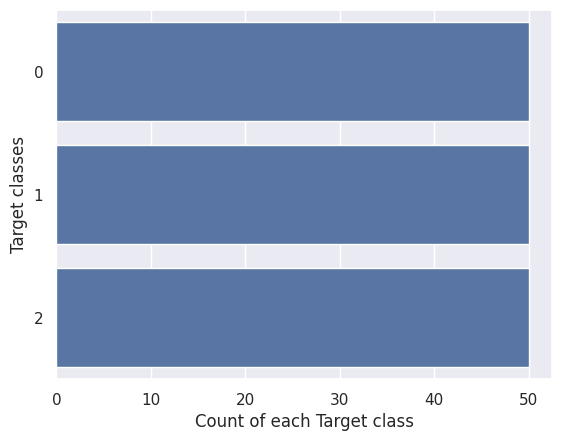

In [7]:
sns.countplot(y=iris.Species ,data=iris)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

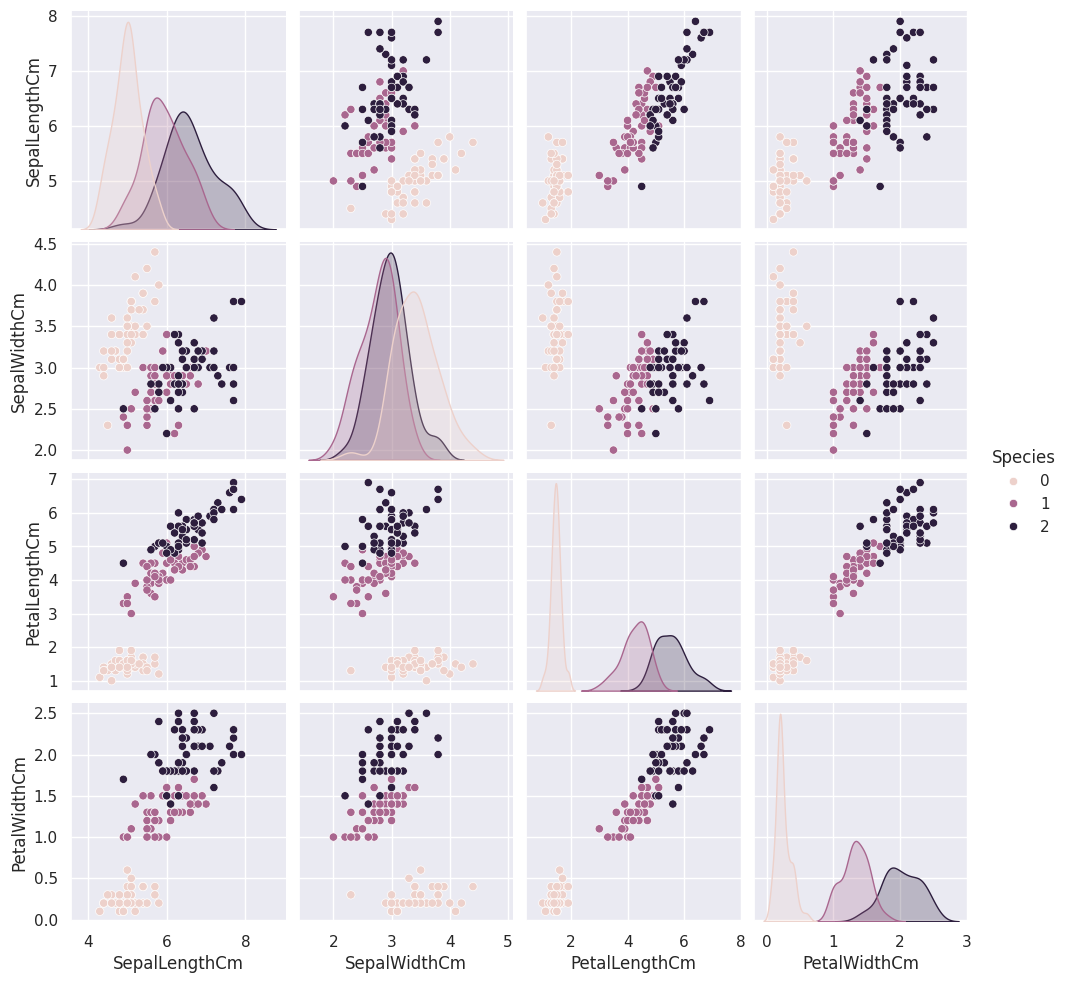

In [8]:
p = sns.pairplot(iris, hue='Species')
plt.show()


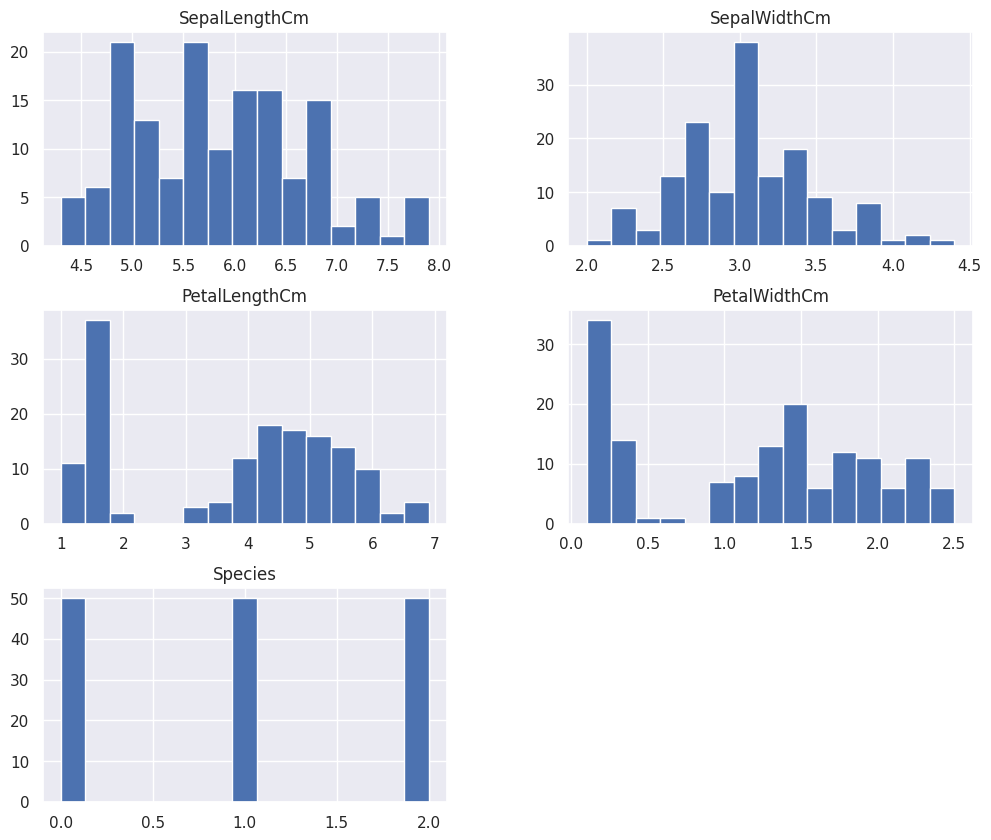

In [9]:
iris.hist(figsize=(12,10),bins = 15)
plt.title("Features Distribution")
plt.show()

In [12]:
X = iris.drop(columns=['Species'])
y = iris['Species']

Data standardization

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## PCA

In [15]:
# Applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'])

# Add the target variable to the DataFrame
pca_df['Species'] = y.values

# Display the DataFrame
print(pca_df)

     PCA_Component_1  PCA_Component_2  PCA_Component_3  Species
0          -2.264542         0.505704        -0.121943        0
1          -2.086426        -0.655405        -0.227251        0
2          -2.367950        -0.318477         0.051480        0
3          -2.304197        -0.575368         0.098860        0
4          -2.388777         0.674767         0.021428        0
..               ...              ...              ...      ...
145         1.870522         0.382822         0.254532        2
146         1.558492        -0.905314        -0.025382        2
147         1.520845         0.266795         0.179277        2
148         1.376391         1.016362         0.931405        2
149         0.959299        -0.022284         0.528794        2

[150 rows x 4 columns]


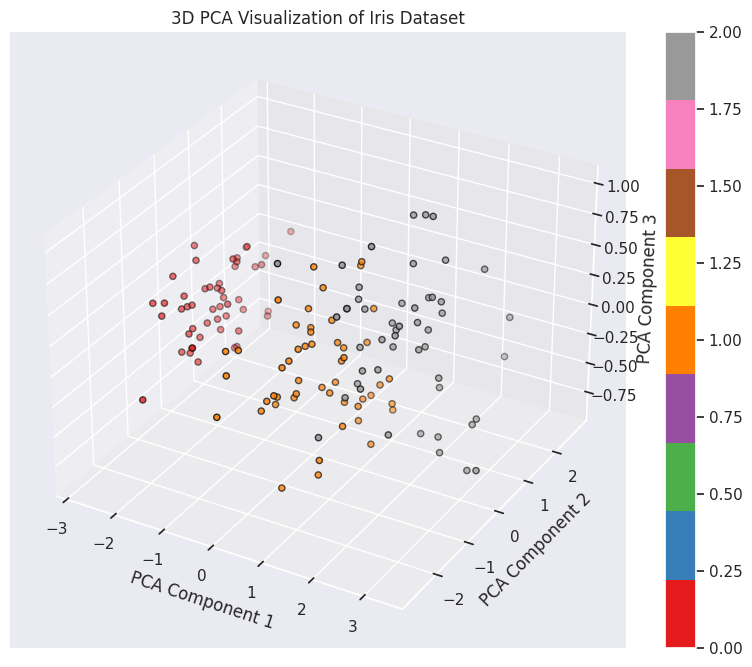

In [18]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Labels and title
ax.set_title("3D PCA Visualization of Iris Dataset")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Colorbar
plt.colorbar(sc)
plt.show()


## EXPLAINED VARIANCE

In [22]:
# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance_df = pd.DataFrame(explained_variance, index=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3'], columns=['Explained Variance'])
print(explained_variance_df)

                 Explained Variance
PCA_Component_1            0.727705
PCA_Component_2            0.230305
PCA_Component_3            0.036838


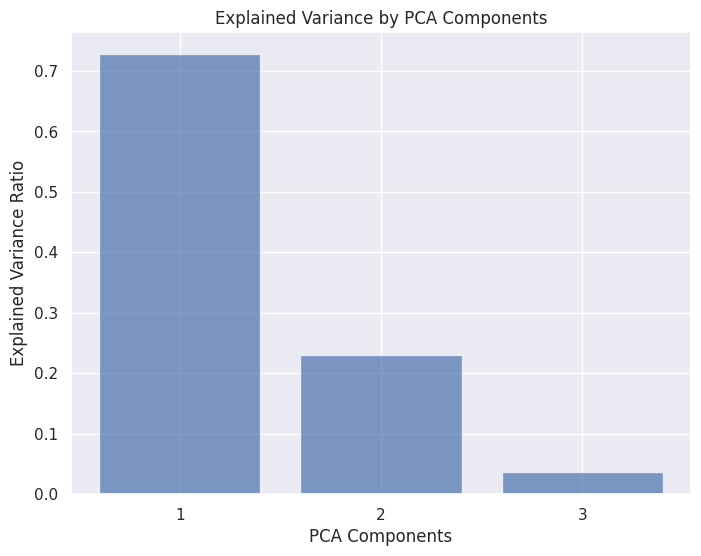

In [23]:
# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='b')
plt.title('Explained Variance by PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

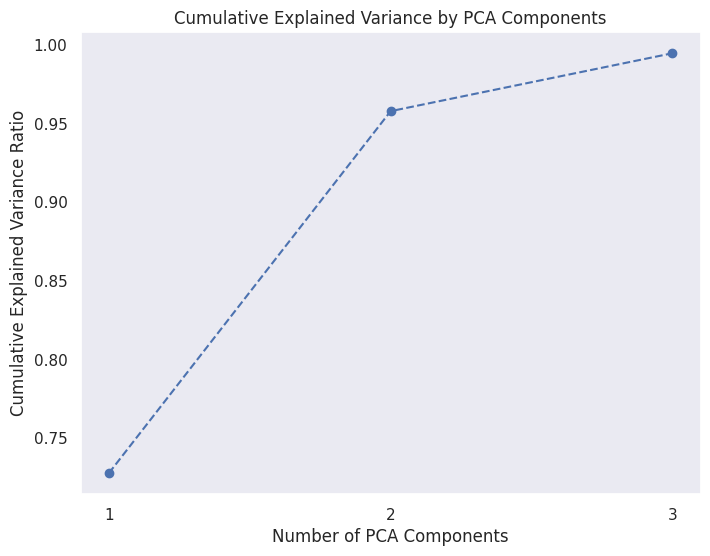

In [24]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid()
plt.show()

## T-SNE

In [20]:
# Applying t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

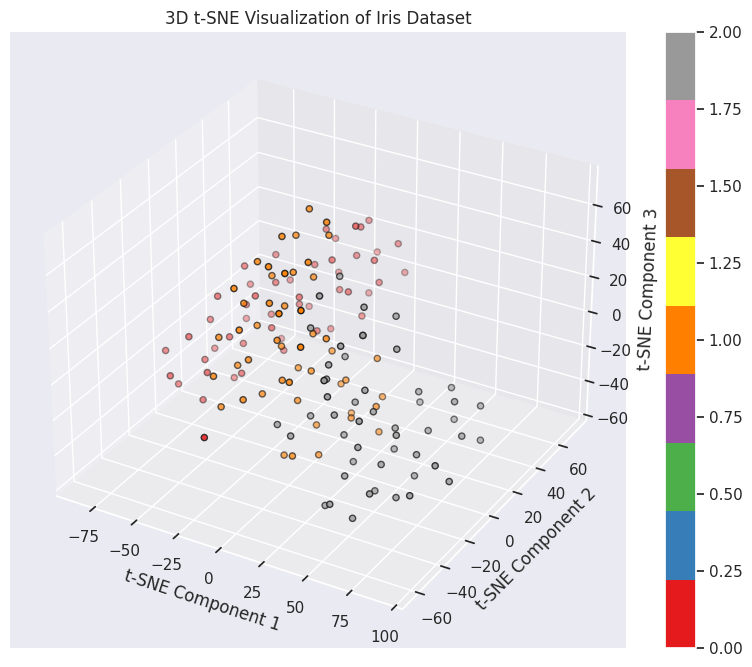

In [26]:
# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2', 'TSNE_Component_3'])
tsne_df['Species'] = y.values

# Plot the t-SNE results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df['TSNE_Component_1'], tsne_df['TSNE_Component_2'], tsne_df['TSNE_Component_3'], c=tsne_df['Species'], cmap=plt.cm.Set1, edgecolor='k')

ax.set_title('3D t-SNE Visualization of Iris Dataset')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.colorbar(scatter)
plt.show()

## KERNEL PCA

In [27]:
# Applying Kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)

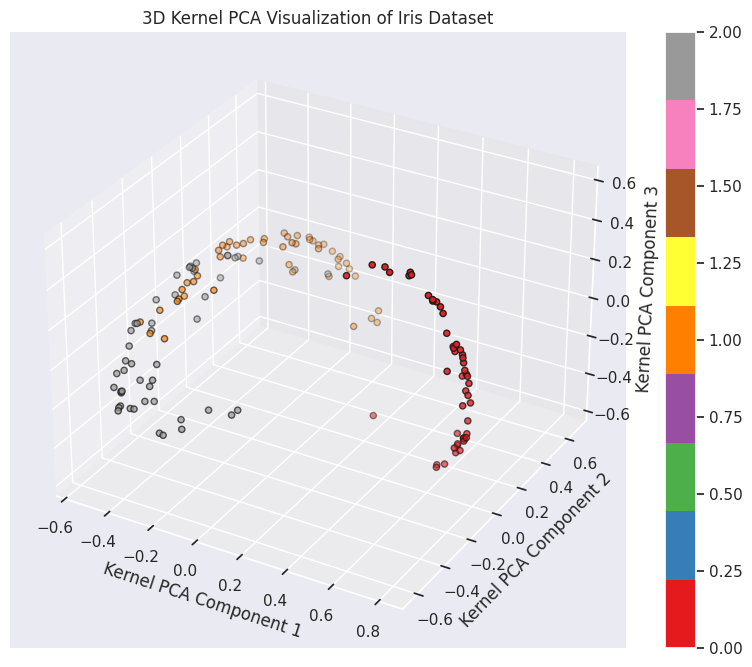

In [28]:
# Create a DataFrame with the Kernel PCA results
kpca_df = pd.DataFrame(data=X_kpca, columns=['KPCA_Component_1', 'KPCA_Component_2', 'KPCA_Component_3'])
kpca_df['Species'] = y

# Plot the Kernel PCA results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kpca_df['KPCA_Component_1'], kpca_df['KPCA_Component_2'], kpca_df['KPCA_Component_3'], c=kpca_df['Species'], cmap=plt.cm.Set1, edgecolor='k')

ax.set_title('3D Kernel PCA Visualization of Iris Dataset')
ax.set_xlabel('Kernel PCA Component 1')
ax.set_ylabel('Kernel PCA Component 2')
ax.set_zlabel('Kernel PCA Component 3')
plt.colorbar(scatter)
plt.show()

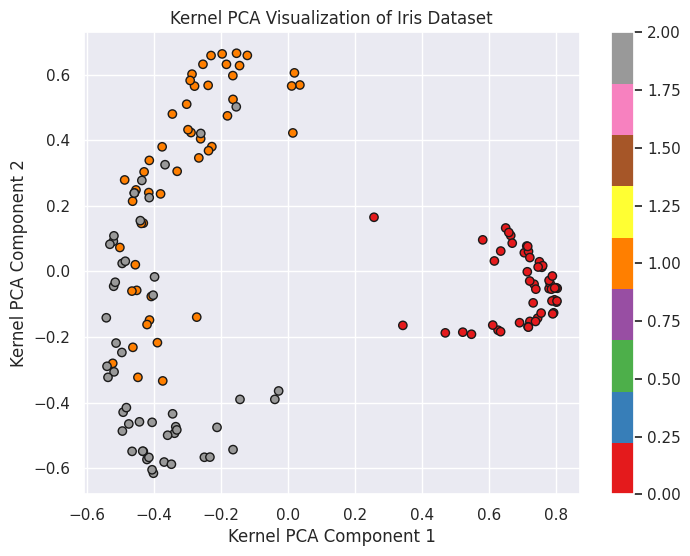

In [24]:
# Plotting Kernel PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title("Kernel PCA Visualization of Iris Dataset")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.colorbar()
plt.show()
